In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["load-graphml" false]
["N-turtles" 80]
["percentage-unhappy" [10 10 40]]
["clear-before-generating" true]
["arduino-on" false]
["mutated" 0]
["links-to-use" "undirected"]
["frac-providers" 0.05 0.05 0.15]



( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["load-graphml" false]\n["N-turtles" 80]\n["percentage-unhappy" [10 10 40]]\n["clear-before-generating" true]\n["arduino-on" false]\n["mutated" 0]\n["links-to-use" "undirected"]\n["frac-providers" 0.05 0.05 0.15]\n\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__58_Arduino_28_PERFECT_DOC_BREED_aligned_BEHAVIOR_SIMILARITY_SEGREGATION_CENTROIDE_BEST experiment_centroid_links_mutated-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [4]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,1,1.5,1,10,0.05,0,2.636364,2.333333,0.079167,0.000000,0.375417,0.0875,0.000000,0.000000,25
1,11,1.5,1,20,0.05,0,2.610390,3.666667,0.000000,0.000000,0.329167,0.0125,0.000000,0.000000,14
2,2,1.5,1,10,0.05,0,2.844156,3.333333,0.000000,0.000000,0.243750,0.0875,0.000000,0.000000,14
3,4,1.5,1,10,0.05,0,2.662338,2.666667,0.041667,0.000000,0.397917,0.0250,0.000000,0.000000,20
4,8,1.5,1,10,0.05,0,2.909091,3.333333,0.037500,0.000000,0.374286,0.1375,0.000000,0.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,324,5.5,5,40,0.15,86,2.866667,2.885714,0.733834,1.531646,0.665625,21.0000,-0.251808,-0.081754,1480
29480,324,5.5,5,40,0.15,87,3.133333,2.771429,0.734091,1.531329,0.665787,20.9875,-0.501808,0.055746,1481
29481,324,5.5,5,40,0.15,88,2.755556,2.914286,0.734091,1.531329,0.665787,20.9875,-0.714308,-0.006754,1481
29482,324,5.5,5,40,0.15,89,2.844444,2.714286,0.734091,1.531329,0.665787,20.9875,-0.676808,-0.269254,1481


In [5]:
df_move=df4.groupby(['frac-providers','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
frac-providers step                                                         
0.05           0         2.619720        1.636738      0.228650  0.000000   
               1         2.716426        2.486527      0.298842  0.516949   
               2         2.892285        2.661664      0.332766  0.748785   
               3         2.919625        2.611333      0.355543  0.852253   
               4         2.899293        2.544941      0.368247  0.842905   
...                           ...             ...           ...       ...   
0.15           86        2.939123        2.575757      0.526703  0.739721   
               87        3.037420        2.486842      0.526878  0.738411   
               88        2.972488        2.462947      0.527941  0.737081   
               89        2.860460        2.497177      0.528920  0.735505   
               90        3.116612        2.548885      0.529431  0.734086   

                     closeness  betweenness  centroid-x  centroid-y  \
frac-providers step                                                   
0.05           0      0.320652    60.325116    0.000000    0.000000   
               1      0.298063    63.833912   -0.067770    0.038854   
               2      0.302545    68.661111   -0.073837    0.048958   
               3      0.304612    70.109028   -0.095890    0.024938   
               4      0.312987    68.094618   -0.093586    0.022477   
...                        ...          ...         ...         ...   
0.15           86     0.431948    42.653472    0.094089   -0.111781   
               87     0.433492    42.487153    0.125339   -0.086781   
               88     0.434304    42.400694    0.114344   -0.075670   
               89     0.435316    42.292940    0.114344   -0.062012   
               90     0.436463    42.115162    0.107515   -0.050554   

                          links  
frac-providers step              
0.05           0      80.152778  
               1     108.861111  
               2     127.791667  
               3     143.699074  
               4     157.310185  
...                         ...  
0.15           86    526.027778  
               87    528.851852  
               88    531.574074  
               89    534.287037  
               90    536.972222  

[182 rows x 9 columns]

In [6]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [7]:
df_move

mood_clients  mood_providers  cluster_coef     paths  \
frac-providers step                                                         
0.05           0         2.619720        1.636738      0.228650  0.000000   
               1         2.716426        2.486527      0.298842  0.516949   
               2         2.892285        2.661664      0.332766  0.748785   
               3         2.919625        2.611333      0.355543  0.852253   
               4         2.899293        2.544941      0.368247  0.842905   
...                           ...             ...           ...       ...   
0.15           86        2.939123        2.575757      0.526703  0.739721   
               87        3.037420        2.486842      0.526878  0.738411   
               88        2.972488        2.462947      0.527941  0.737081   
               89        2.860460        2.497177      0.528920  0.735505   
               90        3.116612        2.548885      0.529431  0.734086   

                     closeness  betweenness  centroid-x  centroid-y  \
frac-providers step                                                   
0.05           0      0.320652    60.325116    0.000000    0.000000   
               1      0.298063    63.833912   -0.067770    0.038854   
               2      0.302545    68.661111   -0.073837    0.048958   
               3      0.304612    70.109028   -0.095890    0.024938   
               4      0.312987    68.094618   -0.093586    0.022477   
...                        ...          ...         ...         ...   
0.15           86     0.431948    42.653472    0.094089   -0.111781   
               87     0.433492    42.487153    0.125339   -0.086781   
               88     0.434304    42.400694    0.114344   -0.075670   
               89     0.435316    42.292940    0.114344   -0.062012   
               90     0.436463    42.115162    0.107515   -0.050554   

                          links  total_mood  
frac-providers step                          
0.05           0      80.152778    4.256458  
               1     108.861111    5.202953  
               2     127.791667    5.553949  
               3     143.699074    5.530958  
               4     157.310185    5.444233  
...                         ...         ...  
0.15           86    526.027778    5.514880  
               87    528.851852    5.524262  
               88    531.574074    5.435435  
               89    534.287037    5.357637  
               90    536.972222    5.665497  

[182 rows x 10 columns]

/tmp/ipykernel_300189/2225355652.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


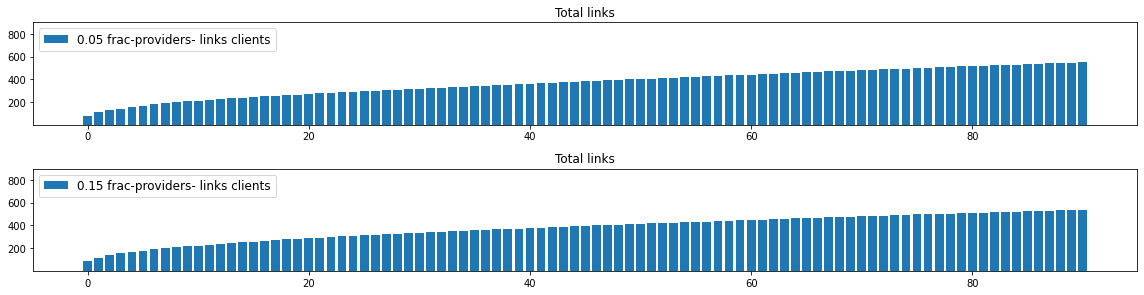

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['links'], label='{} frac-providers- links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

/tmp/ipykernel_300189/61446366.py:14: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


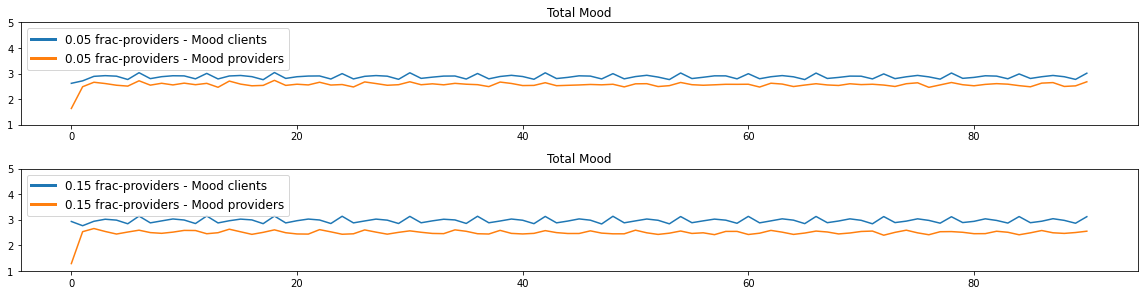

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [ 3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['mood_clients'], label='{} frac-providers - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['mood_providers'], label='{} frac-providers - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



/tmp/ipykernel_300189/2302355802.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


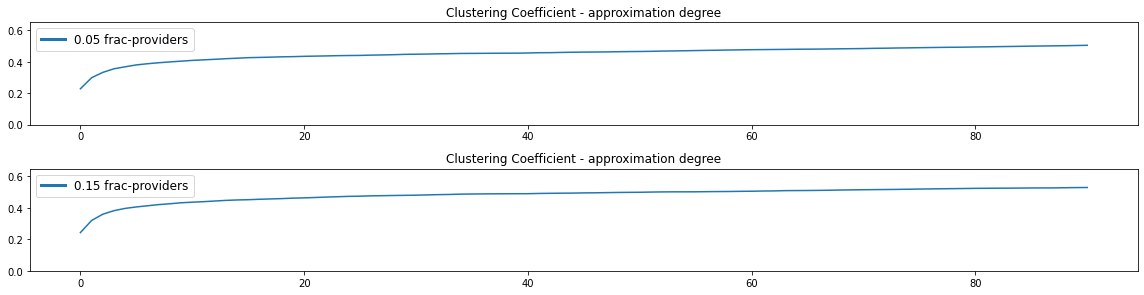

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05, 0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['cluster_coef'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



/tmp/ipykernel_300189/507636111.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


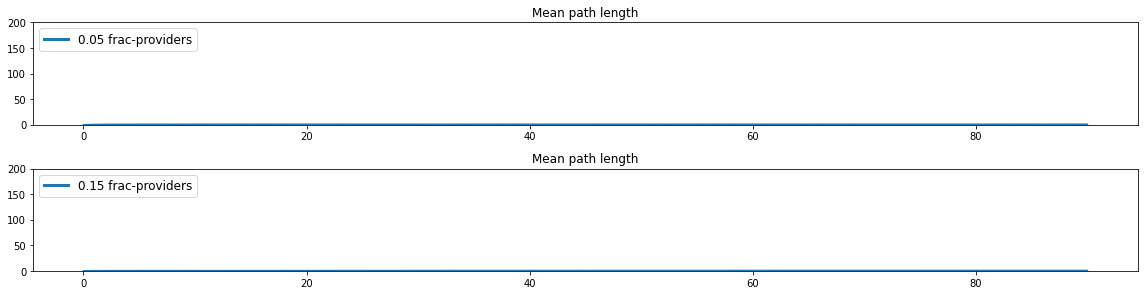

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['paths'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



/tmp/ipykernel_300189/3263416553.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


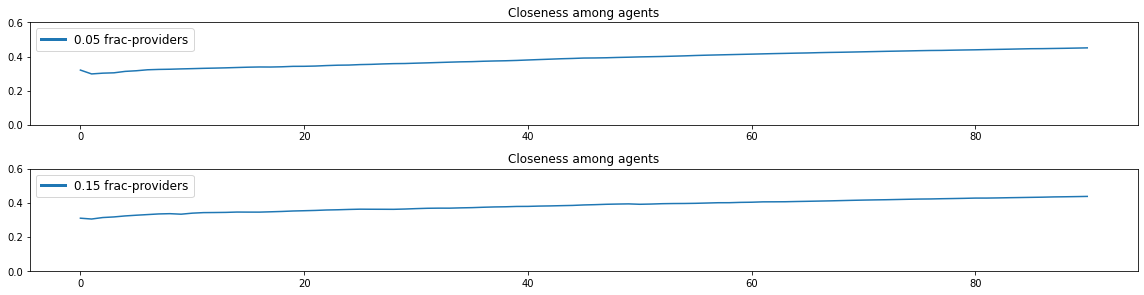

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['closeness'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



/tmp/ipykernel_300189/1763840863.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


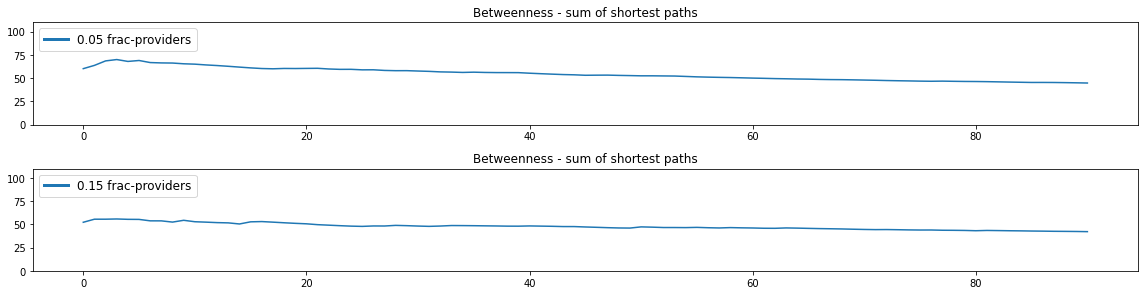

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['betweenness'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [14]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['frac-providers']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['frac-providers']==5].mean()

In [15]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [16]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-6.7463,0.0
1,mood_providers,4.0391,0.0001
2,cluster_coef,-4.4142,0.0
3,paths,19.3846,0.0
4,closeness,0.6028,0.5474
5,betweenness,8.5569,0.0
6,centroid-x,-30.6089,0.0
7,centroid-y,4.5085,0.0
8,links,-0.4513,0.6523
9,total_mood,-0.5074,0.6125


In [17]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,45.5123,0.0
1,mood_providers,16.3143,0.0001
2,cluster_coef,19.4856,0.0
3,paths,375.7624,0.0
4,closeness,0.3634,0.5474
5,betweenness,73.221,0.0
6,centroid-x,936.9028,0.0
7,centroid-y,20.3266,0.0
8,links,0.2037,0.6523
9,total_mood,0.2574,0.6125


In [18]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



KeyError: 'percentage-unhappy'

In [ ]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6624
mood_providers   -0.4342
cluster_coef      0.7970
paths             0.8036
closeness         0.7845
betweenness      -0.6125
total_mood       -0.3487
centroid-x       -0.0714
centroid-y       -0.2436
dtype: float64

In [19]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1.5].iloc[0:30,2:].shape

KeyError: 'percentage-unhappy'

In [20]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

KeyError: 'percentage-unhappy'

In [21]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

KeyError: 'percentage-unhappy'

In [22]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
frac-providers step                                                       
0.05           0           2.6197          1.6367        0.2287  0.0000   
               1           2.7164          2.4865        0.2988  0.5169   
               2           2.8923          2.6617        0.3328  0.7488   
               3           2.9196          2.6113        0.3555  0.8523   
               4           2.8993          2.5449        0.3682  0.8429   
...                           ...             ...           ...     ...   
0.15           86          2.9391          2.5758        0.5267  0.7397   
               87          3.0374          2.4868        0.5269  0.7384   
               88          2.9725          2.4629        0.5279  0.7371   
               89          2.8605          2.4972        0.5289  0.7355   
               90          3.1166          2.5489        0.5294  0.7341   

                     closeness  betweenness  centroid-x  centroid-y     links  \
frac-providers step                                                             
0.05           0        0.3207      60.3251      0.0000      0.0000   80.1528   
               1        0.2981      63.8339     -0.0678      0.0389  108.8611   
               2        0.3025      68.6611     -0.0738      0.0490  127.7917   
               3        0.3046      70.1090     -0.0959      0.0249  143.6991   
               4        0.3130      68.0946     -0.0936      0.0225  157.3102   
...                        ...          ...         ...         ...       ...   
0.15           86       0.4319      42.6535      0.0941     -0.1118  526.0278   
               87       0.4335      42.4872      0.1253     -0.0868  528.8519   
               88       0.4343      42.4007      0.1143     -0.0757  531.5741   
               89       0.4353      42.2929      0.1143     -0.0620  534.2870   
               90       0.4365      42.1152      0.1075     -0.0506  536.9722   

                     total_mood  
frac-providers step              
0.05           0         4.2565  
               1         5.2030  
               2         5.5539  
               3         5.5310  
               4         5.4442  
...                         ...  
0.15           86        5.5149  
               87        5.5243  
               88        5.4354  
               89        5.3576  
               90        5.6655  

[182 rows x 10 columns]

/tmp/ipykernel_300189/1869904554.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


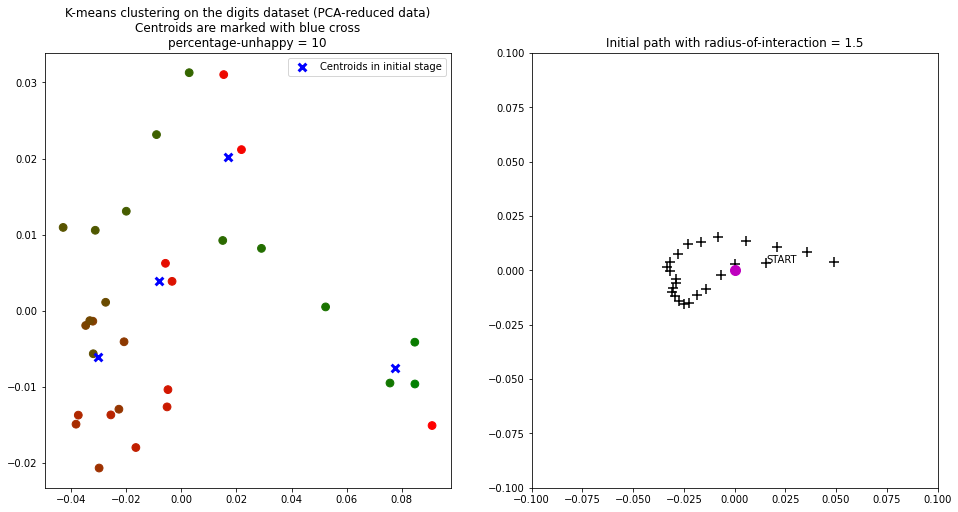

In [23]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [24]:
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==1].shape

(0, 12)

/tmp/ipykernel_300189/3498061775.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


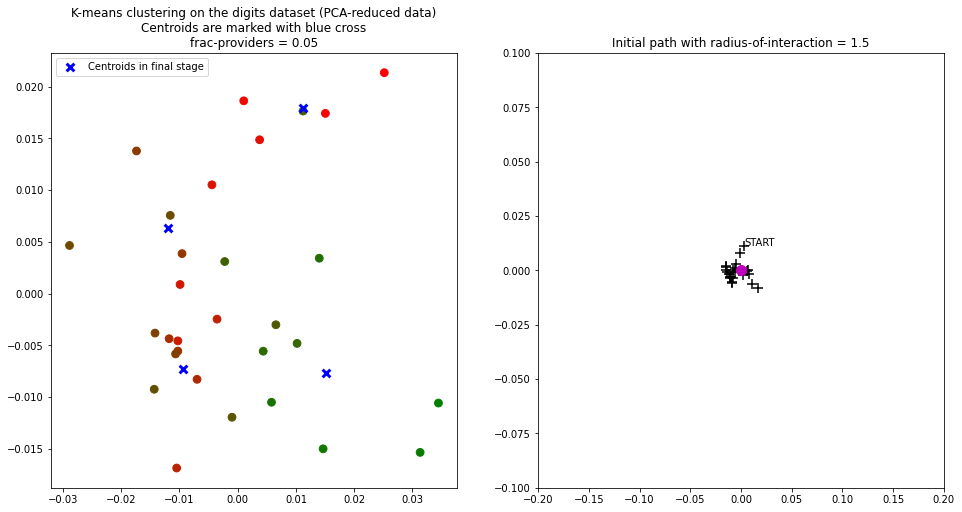

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "frac-providers = 0.05"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [26]:
lag=7


/tmp/ipykernel_300189/3356074056.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


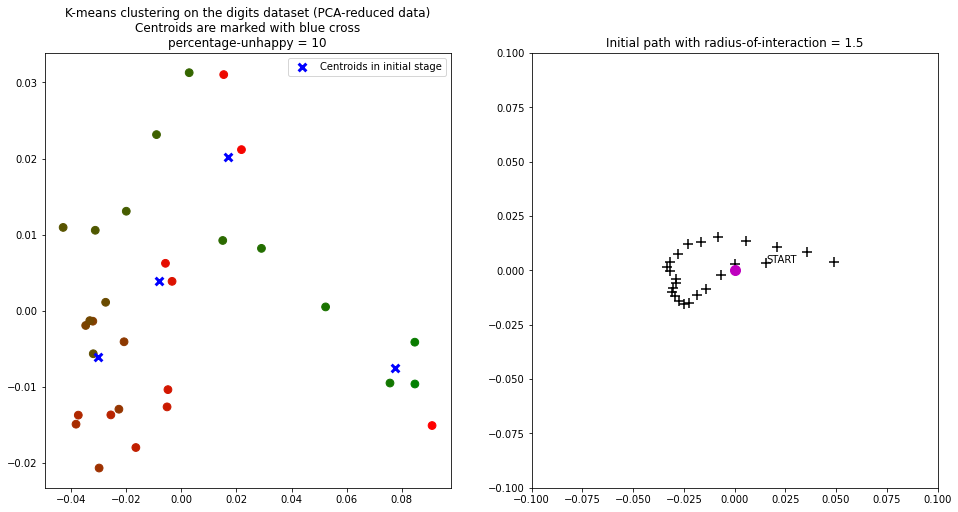

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_300189/4279043870.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


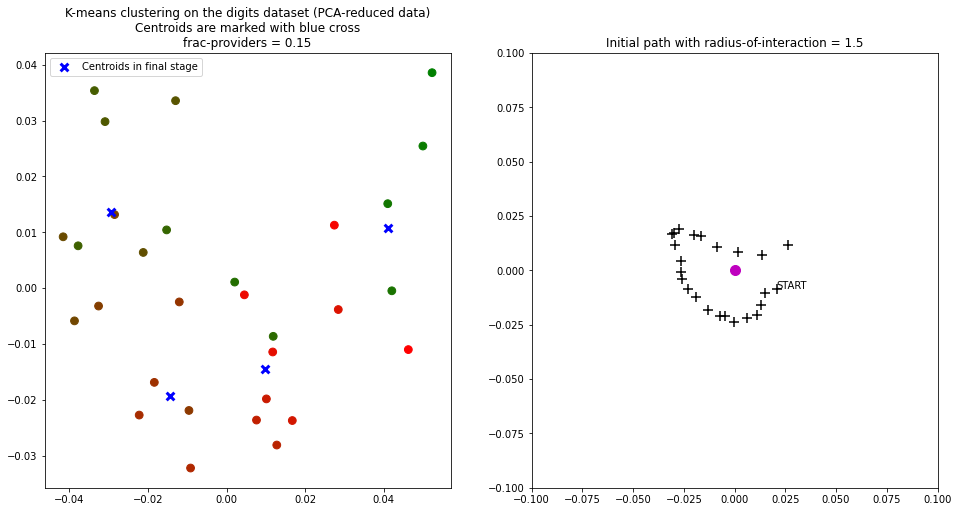

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "frac-providers = 0.15"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()